## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.set_option('display.max_columns', 25)
#pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_csv('kc_house_data.csv')

## Perform initial data review and investigation
1. Check data size
2. Check for NaNs
3. Check for # of non-null values for each column
4. Check the min/max of each column
5. Check for unique values that have a large number of counts
6. Check for duplicates

## Re-Shape / Transform the data and perform preliminary visualizations


1. Clean up missing values by imputing values or dropping
2. Replace ? by imputing values or dropping data
3. Updating categoricals if needed
4. Change datatypes of columns as appropriate



In [3]:
df.shape

(21597, 21)

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# Handy alternate checks if needed
#df.isna().any()
#df.isnull().any()

# Findings from isna().sum():  

- waterfront, view and yr_renovated have missing data


In [6]:
df.info()
# Rationale:  check the datatypes for each column,  noting
# the columns which may need to be converted to other datatypes
# Examples include:  objects which may need to be converted to datatime
# or columns with datatype float,  that are actually categoricals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Findings from info():
1. columns missing values: waterfront, view, yr_renovated

2. Objects (Strings):  date, sqft_basement
     
     Convert sqft_basement into a int


3. Categoricals (currently floats):  waterfront, view
   
   Categoricals (currently ints):  condition, grade 


4. Need Clarification:  sqft_living15,  sqft_lot15



In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Findings from describe():
1. Price range: 78K to 7.7M
2. Bedroom range:  1 to 33 (!)
3. Waterfront value ranges from 0-1
4. View value ranges from 0-4
5. Condition value ranges from a scale of 1-5
6. Grade value ranges from 3-13

There appears to be a mansion in the mix!

# Look for extraneous values using value_counts()
1. Rationale:  This analysis is useful for flushing out missing values in the form
of question marks, or dummy variables
2.  It also gives a preliminary view of the distributions in the data, albeit by numbers rather than graphics


In [8]:

for col in df.columns:
    print(col, '\n', df[col].value_counts().head(10), '\n\n')

id 
 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64 


date 
 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
4/14/2015    121
4/28/2015    121
4/22/2015    121
7/9/2014     121
Name: date, dtype: int64 


price 
 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    133
525000.0    131
Name: price, dtype: int64 


bedrooms 
 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64 


bathrooms 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
Name: bathrooms, dtype: int64 


sqft_living 
 1300    138
1400    135
1440    133
1660    129
1010    129
1800 

# Findings from value_counts():
1. In id you find that houses appear more than 2 times in the listing (in one case, 3 times).  Since these are not duplicates,  it would merit a little further looking at the sales prices to see if each successive sale was higher than the previous.  Another question is to figure out what to do with the multiple entries -- use the latest value because it represents the latest market valuation of the property ?
2. sqft_basement has a lot of ?

In [9]:
# Find out how many non-unique ids there are in the data
len(df.id) - df.id.nunique()


177

In [10]:
# Check for duplicates
duplicates = df[df.duplicated(subset =['id'], keep = False)]
#print(len(duplicates))
duplicates.sort_values(by=['id']).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


In [11]:
df.duplicated().sum()

0

# Finding from duplicated():  No rows are completed duplicated;  however, some properties were sold more than once, between May 2014-May 2015

- What is happening is that some houses were re-listed and sold, within the year, as shown in the table above
- So their id number was duplicated,  but other columns like 'date' and 'price' were unique.

- Further analysis could be done -- to see how much was gained between sales (suggesting house-flipping, if money was made) and whether there were changes to the listing, such as more rooms, more living space etc.

- However, the number of properties with multiple sales in 1 year are pretty few (~87 properties),  that I'm going to leave all the data in the dataset for now.

- If we were to "clean up" these rows,  then most likely I would remove earlier sales data, keeping only the latest.


# Next Steps - Clean up:

1. Update the Missing data in waterfront, view, yr_renovated
2. ? in sqft_basement
3. Convert sqft_basement to float or int


0

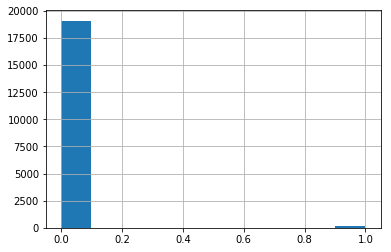

In [12]:
df.waterfront.hist()

# The vast majority of properties do not have a waterfront view
# Set missing values to 0

df.waterfront.fillna(value = 0, inplace = True)
df.waterfront.isna().sum()

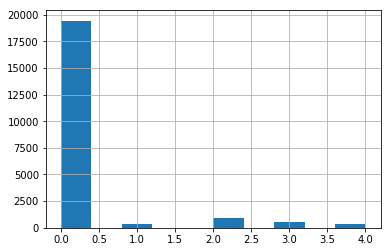

In [13]:
df.view.hist()  # most properties have view = 0
# Set missing values to 0\
df.view.fillna(value = 0, inplace = True)


#df.isna().sum()

In [14]:
df.yr_renovated.fillna(value = 0, inplace = True)

#Verify that the NA numbers have been removed

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Clean the 'sqft_basement' column of data

1. Convert the 'sqft_basement' column data to strings 
2. Use string methods to remove the '?' and the '.0' endings
3. Then convert the data into integers

In [15]:
df.sqft_basement.astype(str)

# Use value counts to see how many unique values are in the data

df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [16]:
df.sqft_basement.replace(to_replace = '?', value = 0.0, inplace = True)

df.sqft_basement.value_counts().head()


0.0      12826
0.0        454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [17]:
# Change type for sqft_basement
df.sqft_basement = df.sqft_basement.astype(str)
df.sqft_basement.value_counts().head()

0.0      13280
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

In [18]:
# Pandas String Replacement
# https://www.geeksforgeeks.org/python-pandas-series-str-slice/

start, stop, step = 0, -2, 1

df['sqft_basement'] = df['sqft_basement'].str.slice(start, stop, step)
df.sqft_basement.value_counts().head()


0      13280
600      217
500      209
700      208
800      201
Name: sqft_basement, dtype: int64

In [19]:
df['sqft_basement'] = df['sqft_basement'].astype(int)

In [20]:
df['sqft_basement'].dtypes

dtype('int32')

In [21]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int32
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Summary of data modifications and notes

1. Changed missing numbers to 0 in 'waterfront', 'view', and 'yr_renovated', based on histograms of these data.  The majority of the data in these columns is zero, so the unknown values likely to also be 0

2. Change 'sqft_basement' from a string to integer, and replaced the column with a different column name (sqft_basement_int)

3. Notes:  the number of unique ids, in the 'id' column shows some properties have been sold more than once in the year (one property was sold 3 times in the year). This is based on the fact that the .duplicates method found no duplicates.  Since the number of unique properties is only 87 out of the ~19,000 properties, there is likely little model accuracy impact.
I have decided for now not to delete the earliest sales data.

# Feature Engineering: Analyse data in several ways, to determine a course of action for model-building

1. Use Pandas to view the data by zipcode
2. Run scatter_matrix to understand the features relationships to one another and to the house price
3. Run correlation matrix to see whether there are co-linear features
    - Decide which to use
4. Run the heatmap to visualize the data

In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

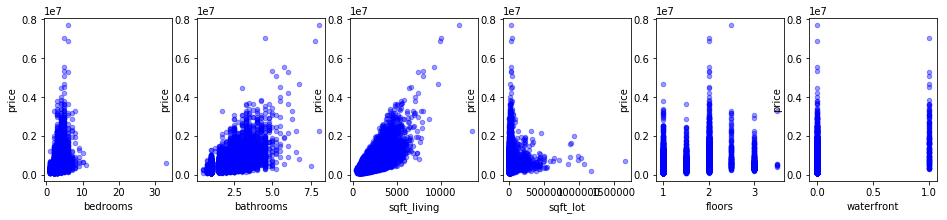

In [23]:



fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(df)[3:9], axes):
                    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'b');

# Observations:
1. The one house with 33 bedrooms (Probably not mansion, but more like a youth hostel?, given the price),  seems to be an outlier.  Recommend to remove to improve the regression on bedrooms
2. Strong relationship with sqft_living

In [24]:
df_clean = df[df.bedrooms != 33]  # remove the house with 33 bedrooms


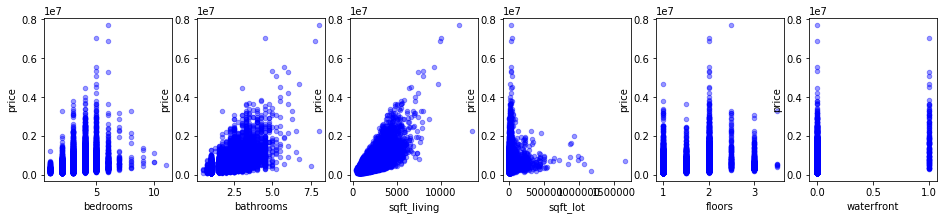

In [25]:

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(df)[3:9], axes):
                    df_clean.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'b');

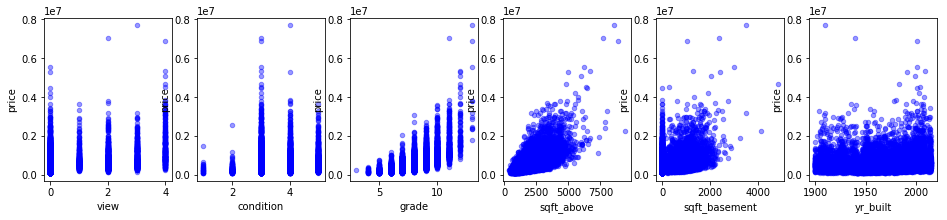

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(df)[9:15], axes):
                    df_clean.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'b');

# Observations 
1. Good relationship between grade and price, sqft_above


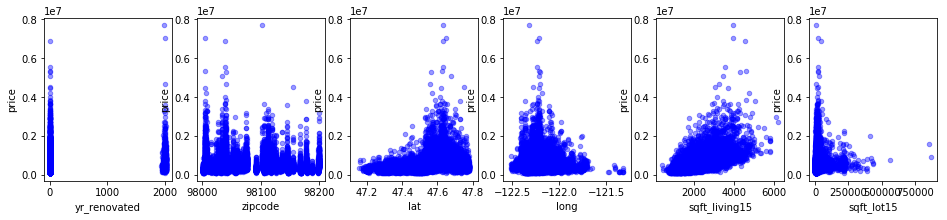

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))
for xcol, ax in zip(list(df)[15:22], axes):
                    df_clean.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha = 0.4, color = 'b');

# Observations
1. On the face of it, the zipcode alone is not a good predictor of pricing.  There are certain zipcodes that definitely have lower pricing. There is a correlation (below) between zipcode and latitudes.
2. Higher prices at higher latitudes, and longitudes below -122.0
3. Since sqft_living15 and sqft_lot15 are the sizes of the nearest 15 neighbors,  more analysis would have to be done to see if there is significance to these 2 columns


In [38]:
# from Stack overflow https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
#with pd.option_context('display.max_rows', 100, 'display.max_columns', 20):   # more options can be specified also

df_clean.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,0.011762,-0.023721,0.008169,-0.010831,-0.004336,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,0.605392,0.321103,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,0.492543,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,0.686664,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,0.876448,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,0.184134,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,0.523970,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,0.071776,0.083053,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657
view,0.011762,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,0.166007,0.270641,-0.054464,0.090337,0.085066,0.006334,-0.077715,0.278921,0.073079
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,-0.158826,0.168431,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093


# Observations:
1. bedrooms, bathrooms, sqft_living, floors, waterfront, view, grade, sqft_basement, and sqft_living15 have some correlation to the price.
2. Other values are much less linearly correlated to the price

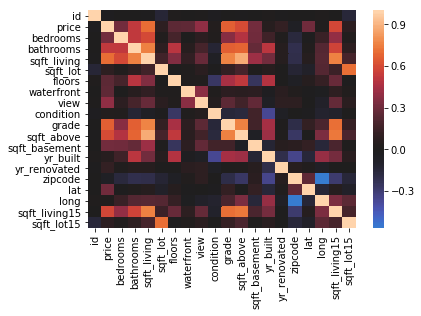

In [40]:
import seaborn as sns
sns.heatmap(df_clean.corr(), center=0)

# Findings from Heatmap

One high correlation is sqft_living to grade and sqft_above


# Look at the histograms to understand which variables are continuous

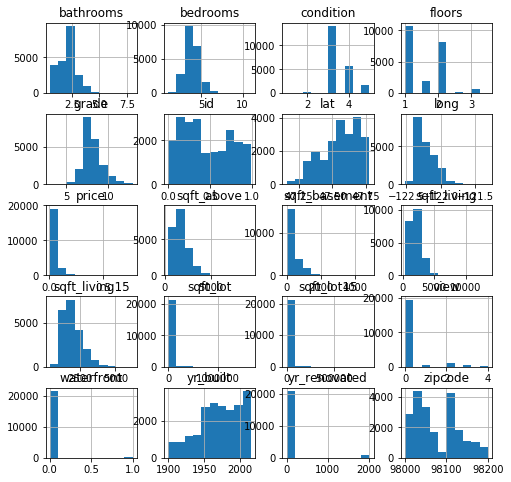

In [29]:
df_clean.hist(figsize = [8,8]);

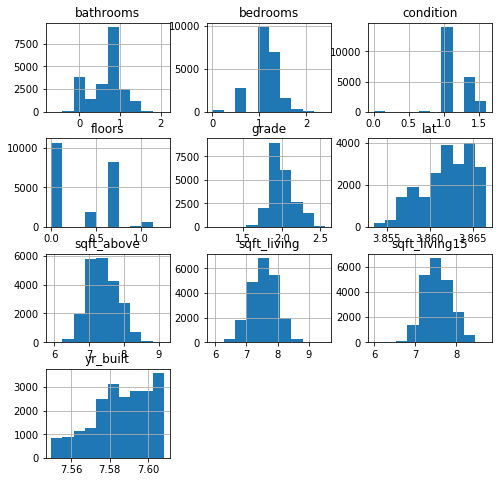

In [30]:
# Try out log transformations
data_log = pd.DataFrame([])
data_log['bathrooms'] = np.log(df_clean['bathrooms'])
data_log['bedrooms'] = np.log(df_clean['bedrooms'])
data_log['lat'] = np.log(df_clean['lat'])
data_log['sqft_living'] = np.log(df_clean['sqft_living'])
data_log['sqft_living15'] = np.log(df_clean['sqft_living15'])
data_log['sqft_above'] = np.log(df_clean['sqft_above'])
data_log['yr_built'] = np.log(df_clean['yr_built'])
data_log['grade'] = np.log(df_clean['grade'])
data_log['floors'] = np.log(df_clean['floors'])
data_log['condition'] = np.log(df_clean['condition'])
data_log.hist(figsize = [8,8]);


#  Observation:  The only features really improved by log transformations are the sqft_living, sqft_above and sqft_living15 
- Does seem to improve the skew on bathrooms and bedrooms


In [39]:
# Normalization
# Use min-max normalization on the grade, log_sqft_living, log_sqft_living15, log_sqft_above
# Use mean normalization on the bedrooms and bathrooms
# Use standardization on yr_built

grade = df_clean['grade']
bathrooms = df_clean['bathrooms']
bedrooms = df_clean['bedrooms']
log_sqft_living = data_log['sqft_living']
log_sqft_living15 = data_log['sqft_living15']
log_sqft_above = data_log['sqft_above']
yr_built = df_clean['yr_built']
sqft_basement = df_clean[sqft_basement]

scaled_grade = (grade - min(grade)) / (max(grade)-min(grade))
scaled_bathrooms = (bathrooms - np.mean(bathrooms)) / (max(bathrooms) - min(bathrooms))
scaled_bedrooms = (bedrooms - np.mean(bedrooms)) / (max(bedrooms) - min(bedrooms))
scaled_logsqft_liv = (log_sqft_living - min(log_sqft_living)) / (max(log_sqft_living) - min(log_sqft_living))
scaled_logsqft_liv15 = (log_sqft_living15 - min(log_sqft_living15)) / (max(log_sqft_living15)-min(log_sqft_living15))
scaled_logsqft_above = (log_sqft_above - min(log_sqft_above)) / (max(log_sqft_above) - min(log_sqft_above))
scaled_yrbuilt = (yr_built - np.mean(yr_built)) / np.sqrt(np.var(yr_built))
scaled_sqft_basement = (sqft_basement - np.mean(sqft_basement)) / (max(sqft_basement)- min(sqft_basement))


data_final = pd.DataFrame([])
data_final['bedrooms'] = scaled_bedrooms
data_final['bathrooms'] = scaled_bathrooms
data_final['grade'] = scaled_grade
data_final['sq_ft_living'] = scaled_logsqft_liv
data_final['sq_ft_living15'] = scaled_logsqft_liv15
data_final['sq_ft_above'] = scaled_logsqft_above
data_final['sq_ft_basement'] = scaled_sqft_basement
data_final['yr_built'] = scaled_yr_built

price = df_clean['price']
 = pd.concat[mpg, data_fin]


IndentationError: unexpected indent (<ipython-input-39-d542498d0aa9>, line 36)

In [ ]:
df_clean.groupby('zipcode').count().head()

In [ ]:
df_clean.groupby('zipcode').median().head()

# Model Building Strategy
1. Just use all the data in df_clean and build a multi-linear model
2. Drop out all the columns of data that have either too high (>0.75) or too low (<|0.1|) and build a multi-linear model
3. Feature Scale and normalize with features from 2
4. Leave in all the data, but divide the data by the latitude, and remodel


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
         'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
          'zipcode', 'lat', 'long', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = df_clean).fit()
model.summary()

In [ ]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
          'grade', 'sqft_basement', 'lat']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = df_clean).fit()
model.summary()

In [ ]:
# Try out feature scaling and normalization